In [73]:
import numpy as np #Importing libraries + reading csvs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
act17 = pd.read_csv('../data/cleaned_data/act17newclean.csv')
act18 = pd.read_csv('../data/cleaned_data/act18newclean.csv')
act19 = pd.read_csv('../data/cleaned_data/act19newclean.csv')
sat17 = pd.read_csv('../data/cleaned_data/sat17newclean.csv')
sat18 = pd.read_csv('../data/cleaned_data/sat18newclean.csv')
sat19 = pd.read_csv('../data/cleaned_data/sat19newclean.csv')
sattotal = pd.read_csv('../data/cleaned_data/sattotalclean.csv')
acttotal = pd.read_csv('../data/cleaned_data/acttotalclean.csv')

In [74]:
sattotal.head()

,Unnamed: 0,state,participation17,ebrw17,math17,total17,participation18,ebrw18,math18,total18,participation19,ebrw19,math19,total19,gdp_rank_19,sat_free,act_free,population_rank
0,0,Alabama,0.05,593,572,1165,0.06,595,571,1166,0.07,583,560,1143,46.0,False,True,24
1,1,Alaska,0.38,547,533,1080,0.43,562,544,1106,0.41,556,541,1097,4.0,False,False,48
2,2,Arizona,0.30,563,553,1116,0.29,577,572,1149,0.31,569,565,1134,41.0,False,False,14
3,3,Arkansas,0.03,614,594,1208,0.05,592,576,1169,0.06,582,559,1141,49.0,False,True,33
4,4,California,0.53,531,524,1055,0.60,540,536,1076,0.63,534,531,1065,6.0,False,False,1


In [75]:
acttotal.head()

,Unnamed: 0,state,participation17,composite17,participation18,composite18,participation19,composite19,gdp_rank_19,act_free,sat_free,population_rank
0,0,National,0.60,21.0,NaN,NaN,0.52,20.7,NaN,False,False,NaN
1,1,Alabama,1.00,19.2,1.00,19.1,1.00,18.9,46.0,True,False,24.0
2,2,Alaska,0.65,19.8,0.33,20.8,0.38,20.1,4.0,False,False,48.0
3,3,Arizona,0.62,19.7,0.66,19.2,0.73,19.0,41.0,False,False,14.0
4,4,Arkansas,1.00,19.4,1.00,19.4,1.00,19.3,49.0,True,False,33.0


#### Dropping unwanted column from CSV conversion in cleaning stage

In [76]:
# Dropping unwanted column from CSV conversion in cleaning stage
sattotal.drop(['Unnamed: 0'], axis = 1, inplace = True)
acttotal.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [77]:
acttotal.dtypes

state               object
participation17    float64
composite17        float64
participation18    float64
composite18        float64
participation19    float64
composite19        float64
gdp_rank_19        float64
act_free              bool
sat_free              bool
population_rank    float64
dtype: object

In [78]:
sattotal.dtypes

state               object
participation17    float64
ebrw17               int64
math17               int64
total17              int64
participation18    float64
ebrw18               int64
math18               int64
total18              int64
participation19    float64
ebrw19               int64
math19               int64
total19              int64
gdp_rank_19        float64
sat_free              bool
act_free              bool
population_rank      int64
dtype: object

In [79]:
acttotal.head()

,state,participation17,composite17,participation18,composite18,participation19,composite19,gdp_rank_19,act_free,sat_free,population_rank
0,National,0.60,21.0,NaN,NaN,0.52,20.7,NaN,False,False,NaN
1,Alabama,1.00,19.2,1.00,19.1,1.00,18.9,46.0,True,False,24.0
2,Alaska,0.65,19.8,0.33,20.8,0.38,20.1,4.0,False,False,48.0
3,Arizona,0.62,19.7,0.66,19.2,0.73,19.0,41.0,False,False,14.0
4,Arkansas,1.00,19.4,1.00,19.4,1.00,19.3,49.0,True,False,33.0


#### Dropping the national row as I don't foresee myself using it 

In [80]:
acttotal.drop([0], inplace = True)

In [81]:
acttotal.head()

,state,participation17,composite17,participation18,composite18,participation19,composite19,gdp_rank_19,act_free,sat_free,population_rank
1,Alabama,1.00,19.2,1.00,19.1,1.00,18.9,46.0,True,False,24.0
2,Alaska,0.65,19.8,0.33,20.8,0.38,20.1,4.0,False,False,48.0
3,Arizona,0.62,19.7,0.66,19.2,0.73,19.0,41.0,False,False,14.0
4,Arkansas,1.00,19.4,1.00,19.4,1.00,19.3,49.0,True,False,33.0
5,California,0.31,22.8,0.27,22.7,0.23,22.6,6.0,False,False,1.0


#### Locating the groups of states depending on their ACT and SAT free status

In [82]:
sat_true_act_false = sattotal.loc[(sattotal['sat_free'] == True)&(sattotal['act_free'] == False)]
sat_true_act_false['freeindicator'] = 1 
#Add column help https://www.dataindependent.com/pandas/pandas-dataframe-add-column/
sat_true_act_false

<ipython-input-82-5470579ad023>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat_true_act_false['freeindicator'] = 1


,state,participation17,ebrw17,math17,total17,participation18,ebrw18,math18,total18,participation19,ebrw19,math19,total19,gdp_rank_19,sat_free,act_free,population_rank,freeindicator
5,Colorado,0.11,606,595,1201,1.00,519,506,1025,1.00,518,506,1024,15.0,True,False,20,1
6,Connecticut,1.00,530,512,1041,1.00,535,519,1053,1.00,529,516,1046,7.0,True,False,29,1
7,Delaware,1.00,503,492,996,1.00,505,492,998,1.00,499,486,985,10.0,True,False,45,1
8,District of Columbia,1.00,482,468,950,0.92,497,480,977,0.94,495,480,975,1.0,True,False,49,1
12,Idaho,0.93,513,493,1005,1.00,508,493,1001,1.00,505,488,993,47.0,True,False,38,1
13,Illinois,0.09,559,556,1115,0.99,513,506,1019,1.00,509,504,1013,13.0,True,False,6,1
19,Maine,0.95,513,499,1012,0.99,512,501,1013,0.99,512,502,1013,43.0,True,False,42,1
22,Michigan,1.00,509,495,1005,1.00,511,499,1011,1.00,507,496,1003,37.0,True,False,10,1
28,New Hampshire,0.96,532,520,1052,0.96,535,528,1063,0.95,533,526,1059,18.0,True,False,41,1
38,Rhode Island,0.71,539,524,1062,0.97,513,505,1018,1.00,503,492,995,27.0,True,False,44,1


### SAT Free Clarification
Colorado, Illinois, and West Virginia all made the SAT free eventually but not in 2017 and in West Virginia's case not in 2018. This means that the SAT change has made the SAT more attractive to states as their preferred choice of standardized test.

In [83]:
states_both_true = sattotal.loc[(sattotal['act_free'] == True)&(sattotal['sat_free'] == True)]
states_both_true['freeindicator'] = 2
states_both_true

<ipython-input-83-13f2a22df70c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_both_true['freeindicator'] = 2


,state,participation17,ebrw17,math17,total17,participation18,ebrw18,math18,total18,participation19,ebrw19,math19,total19,gdp_rank_19,sat_free,act_free,population_rank,freeindicator
34,Ohio,0.12,578,570,1149,0.18,552,547,1099,0.19,550,548,1097,25.0,True,True,7,2
35,Oklahoma,0.07,530,517,1047,0.08,541,521,1062,0.22,490,472,963,30.0,True,True,28,2
39,South Carolina,0.50,543,521,1064,0.55,547,523,1070,0.68,526,504,1030,45.0,True,True,23,2
41,Tennessee,0.05,623,604,1228,0.06,624,607,1231,0.07,618,602,1220,36.0,True,True,15,2


In [84]:
act_true_sat_false = sattotal.loc[(sattotal['act_free'] == True)&(sattotal['sat_free'] == False)]
act_true_sat_false['freeindicator'] = 3
act_true_sat_false

<ipython-input-84-e2e298181f6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_true_sat_false['freeindicator'] = 3


,state,participation17,ebrw17,math17,total17,participation18,ebrw18,math18,total18,participation19,ebrw19,math19,total19,gdp_rank_19,sat_free,act_free,population_rank,freeindicator
0,Alabama,0.05,593,572,1165,0.06,595,571,1166,0.07,583,560,1143,46.0,False,True,24,3
3,Arkansas,0.03,614,594,1208,0.05,592,576,1169,0.06,582,559,1141,49.0,False,True,33,3
11,Hawaii,0.55,544,541,1085,0.56,480,530,1010,0.54,550,550,1100,17.0,False,True,40,3
17,Kentucky,0.04,631,616,1247,0.04,630,618,1248,0.04,620,612,1232,44.0,False,True,26,3
18,Louisiana,0.04,611,586,1198,0.04,615,595,1210,0.05,610,591,1200,28.0,False,True,25,3
24,Mississippi,0.02,634,607,1242,0.03,630,606,1236,0.03,628,608,1237,50.0,False,True,34,3
26,Montana,0.10,605,591,1196,0.10,606,592,1198,0.09,603,596,1199,42.0,False,True,43,3
32,North Carolina,0.49,546,535,1081,0.52,554,543,1098,0.51,554,546,1100,35.0,False,True,9,3
33,North Dakota,0.02,635,621,1256,0.02,640,643,1283,0.02,627,636,1263,5.0,False,True,47,3
43,Utah,0.03,624,614,1238,0.04,480,530,1010,0.04,614,615,1230,29.0,False,True,30,3


In [85]:
states_both_false = sattotal.loc[(sattotal['act_free'] == False)&(sattotal['sat_free'] == False)]
states_both_false['freeindicator'] = 4
states_both_false

<ipython-input-85-101a230726e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_both_false['freeindicator'] = 4


,state,participation17,ebrw17,math17,total17,participation18,ebrw18,math18,total18,participation19,ebrw19,math19,total19,gdp_rank_19,sat_free,act_free,population_rank,freeindicator
1,Alaska,0.38,547,533,1080,0.43,562,544,1106,0.41,556,541,1097,4.0,False,False,48,4
2,Arizona,0.30,563,553,1116,0.29,577,572,1149,0.31,569,565,1134,41.0,False,False,14,4
4,California,0.53,531,524,1055,0.60,540,536,1076,0.63,534,531,1065,6.0,False,False,1,4
9,Florida,0.83,520,497,1017,0.56,550,549,1099,1.00,516,483,999,40.0,False,False,3,4
10,Georgia,0.61,535,515,1050,0.70,542,522,1064,0.71,538,519,1058,31.0,False,False,8,4
14,Indiana,0.63,542,532,1074,0.63,542,532,1074,0.66,543,537,1080,33.0,False,False,17,4
15,Iowa,0.02,641,635,1275,0.03,634,631,1265,0.03,622,622,1244,21.0,False,False,32,4
16,Kansas,0.04,632,628,1260,0.04,633,631,1265,0.04,618,623,1241,22.0,False,False,35,4
20,Maryland,0.69,536,52,1060,0.76,545,535,1080,0.82,535,523,1058,12.0,False,False,19,4
21,Massachusetts,0.76,555,551,1107,0.80,562,563,1125,0.81,559,561,1120,2.0,False,False,16,4


#### Merging the free indicator columns and making them all one column. Different integers representing different groups of states

In [86]:
newtotal = pd.merge(sattotal,states_both_false[['state', 'freeindicator']],on='state', how='left')
newtotal = pd.merge(newtotal,states_both_true[['state', 'freeindicator']], on='state', how='left')
newtotal = pd.merge(newtotal,act_true_sat_false[['state', 'freeindicator']], on='state', how='left')
newtotal = pd.merge(newtotal,sat_true_act_false[['state', 'freeindicator']], on='state', how='left')
newtotal.head()

,state,participation17,ebrw17,math17,total17,participation18,ebrw18,math18,total18,participation19,...,math19,total19,gdp_rank_19,sat_free,act_free,population_rank,freeindicator_x,freeindicator_y,freeindicator_x,freeindicator_y
0,Alabama,0.05,593,572,1165,0.06,595,571,1166,0.07,...,560,1143,46.0,False,True,24,NaN,NaN,3.0,NaN
1,Alaska,0.38,547,533,1080,0.43,562,544,1106,0.41,...,541,1097,4.0,False,False,48,4.0,NaN,NaN,NaN
2,Arizona,0.30,563,553,1116,0.29,577,572,1149,0.31,...,565,1134,41.0,False,False,14,4.0,NaN,NaN,NaN
3,Arkansas,0.03,614,594,1208,0.05,592,576,1169,0.06,...,559,1141,49.0,False,True,33,NaN,NaN,3.0,NaN
4,California,0.53,531,524,1055,0.60,540,536,1076,0.63,...,531,1065,6.0,False,False,1,4.0,NaN,NaN,NaN


In [87]:
cols = ['freeindicator_x', 'freeindicator_y']
newtotal = newtotal.assign(freeindicator=newtotal[cols].sum(1)).drop(cols, 1)
newtotal['freeindicator']=newtotal['freeindicator'].astype(int)
newtotal.head()

,state,participation17,ebrw17,math17,total17,participation18,ebrw18,math18,total18,participation19,ebrw19,math19,total19,gdp_rank_19,sat_free,act_free,population_rank,freeindicator
0,Alabama,0.05,593,572,1165,0.06,595,571,1166,0.07,583,560,1143,46.0,False,True,24,3
1,Alaska,0.38,547,533,1080,0.43,562,544,1106,0.41,556,541,1097,4.0,False,False,48,4
2,Arizona,0.30,563,553,1116,0.29,577,572,1149,0.31,569,565,1134,41.0,False,False,14,4
3,Arkansas,0.03,614,594,1208,0.05,592,576,1169,0.06,582,559,1141,49.0,False,True,33,3
4,California,0.53,531,524,1055,0.60,540,536,1076,0.63,534,531,1065,6.0,False,False,1,4


### The creation of scatterplots for specific years and subplots that have all the plots needed

In [88]:
#New package import done for the creation of a color-coordinated legend
import matplotlib.patches as mpatches

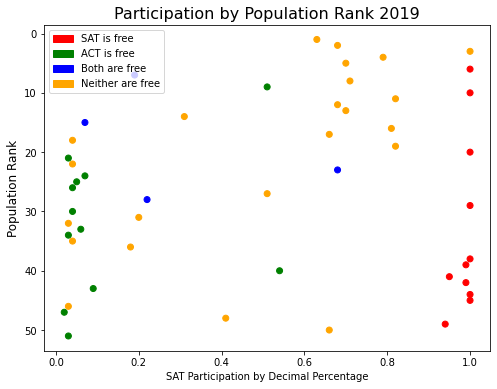

In [89]:
colordict = {1:'r', 2:'b', 3:'g', 4:'orange'}
colors = newtotal['freeindicator'].map(colordict)
plt.figure(figsize=(8,6))
plt.scatter(x=newtotal['participation19'], y=newtotal['population_rank'], color = colors)
plt.gca().invert_yaxis()
plt.ylabel('Population Rank', fontsize = 12)
plt.xlabel('SAT Participation by Decimal Percentage')
plt.title('Participation by Population Rank 2019', fontsize = 16)
#Creation of the legend
red_patch = mpatches.Patch(color='red', label='SAT is free')
green_patch = mpatches.Patch(color='green', label='ACT is free')
blue_patch = mpatches.Patch(color='blue', label='Both are free')
orange_patch = mpatches.Patch(color='orange', label='Neither are free')
plt.legend(handles=[red_patch, green_patch, blue_patch, orange_patch], loc = 'upper left')

plt.savefig('../graphs/scatterplot2019')
#Legend help https://matplotlib.org/2.0.2/users/legend_guide.html
#General scatter plot help https://stackabuse.com/matplotlib-scatterplot-tutorial-and-examples/

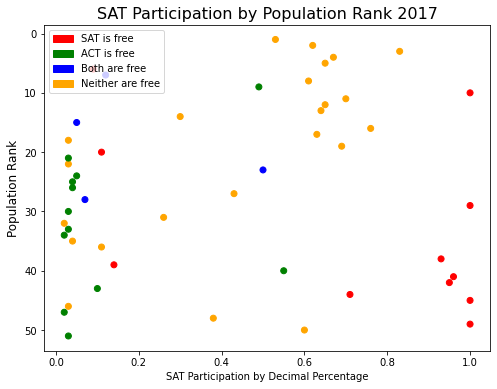

In [90]:
plt.figure(figsize=(8,6))
plt.scatter(x=sattotal['participation17'], y=sattotal['population_rank'], color = colors)
plt.gca().invert_yaxis()
plt.ylabel('Population Rank', fontsize = 12)
plt.xlabel('SAT Participation by Decimal Percentage')
plt.legend(handles=[red_patch, green_patch, blue_patch, orange_patch], loc = 'upper left')
plt.title('SAT Participation by Population Rank 2017', fontsize = 16)
plt.savefig('../graphs/scatterplot2017')

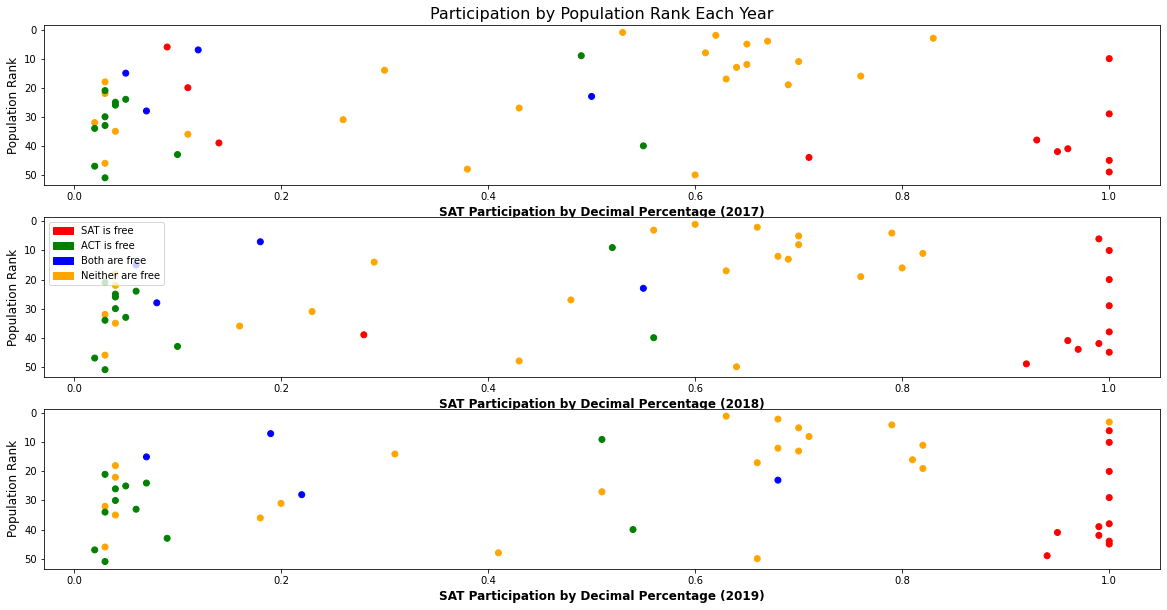

In [91]:
fig, ax = plt.subplots(3, figsize=(20, 10))
ax[0].scatter(x=sattotal['participation17'], y=sattotal['population_rank'], color = colors)
ax[0].invert_yaxis()
ax[0].set_ylabel('Population Rank', fontsize = 12)
ax[0].set_xlabel('SAT Participation by Decimal Percentage (2017)', fontweight = 'bold', fontsize = 12)
ax[0].set_title('Participation by Population Rank Each Year', fontsize = 16)

ax[1].scatter(x=sattotal['participation18'], y=sattotal['population_rank'], color = colors)
ax[1].invert_yaxis()
ax[1].set_ylabel('Population Rank', fontsize = 12)
ax[1].legend(handles=[red_patch, green_patch, blue_patch, orange_patch], loc = 'upper left')
ax[1].set_xlabel('SAT Participation by Decimal Percentage (2018)', fontweight = 'bold', fontsize = 12)

ax[2].scatter(x=sattotal['participation19'], y=sattotal['population_rank'], color = colors)
ax[2].invert_yaxis()
ax[2].set_ylabel('Population Rank', fontsize = 12)
ax[2].set_xlabel('SAT Participation by Decimal Percentage (2019)', fontweight = 'bold', fontsize = 12)



plt.savefig('../graphs/participation_pop_subplot.png', bbox_inches='tight')
plt.show();


Drastic change in participation over time as more neutral states (states that have neither the ACT or SAT for free) lean towards the SAT and that three states have made the SAT free statewide since 2017. 

#### Creating subsets

In [92]:
satrelevant = sattotal[['state', 'participation17', 'participation18', 'participation19', 'sat_free', 'act_free', 'gdp_rank_19', 'population_rank']]

In [93]:
actrelevant = acttotal[['state', 'participation17', 'participation18', 'participation19']]

In [94]:
actparticipation = acttotal[['state', 'participation17', 'participation18', 'participation19']]

In [95]:
satparticipation = sattotal[['state', 'participation17', 'participation18', 'participation19']]

In [96]:
satt = sattotal[['state', 'total17', 'total18', 'total19']]

In [97]:
actt = acttotal[['state', 'composite17', 'composite18', 'composite19']]

In [98]:
insertedcols = sattotal[['state', 'sat_free', 'act_free', 'gdp_rank_19', 'population_rank']]

In [99]:
participation_act_and_sat = pd.merge(actparticipation, satparticipation, on='state')

participation_act_and_sat.head()

,state,participation17_x,participation18_x,participation19_x,participation17_y,participation18_y,participation19_y
0,Alabama,1.00,1.00,1.00,0.05,0.06,0.07
1,Alaska,0.65,0.33,0.38,0.38,0.43,0.41
2,Arizona,0.62,0.66,0.73,0.30,0.29,0.31
3,Arkansas,1.00,1.00,1.00,0.03,0.05,0.06
4,California,0.31,0.27,0.23,0.53,0.60,0.63


In [100]:
participation_act_and_sat.rename(columns = {'participation17_x':'participation_17_act', 
                                            'participation18_x': 'participation_18_act',
                                           'participation19_x': 'participation_19_act',
                                           'participation17_y': 'participation_17_sat',
                                           'participation18_y': 'participation_18_sat',
                                           'participation19_y': 'participation_19_sat'}, inplace = True)

participation_act_and_sat.head()

,state,participation_17_act,participation_18_act,participation_19_act,participation_17_sat,participation_18_sat,participation_19_sat
0,Alabama,1.00,1.00,1.00,0.05,0.06,0.07
1,Alaska,0.65,0.33,0.38,0.38,0.43,0.41
2,Arizona,0.62,0.66,0.73,0.30,0.29,0.31
3,Arkansas,1.00,1.00,1.00,0.03,0.05,0.06
4,California,0.31,0.27,0.23,0.53,0.60,0.63


#### Finding the skews, medians, and means + attaching them to variables

In [101]:
participation_act_and_sat.skew()

participation_17_act   -0.166141
participation_18_act    0.012200
participation_19_act    0.080480
participation_17_sat    0.313940
participation_18_sat    0.101009
participation_19_sat   -0.018825
dtype: float64

The participation columns are not skewed, its best to use mean in this case as the center value

In [102]:
participation_medians = participation_act_and_sat.median()
participation_medians

participation_17_act    0.680
participation_18_act    0.655
participation_19_act    0.515
participation_17_sat    0.405
participation_18_sat    0.535
participation_19_sat    0.585
dtype: float64

In [103]:
participation_means = participation_act_and_sat.mean()

participation_means

participation_17_act    0.6488
participation_18_act    0.6096
participation_19_act    0.5784
participation_17_sat    0.4054
participation_18_sat    0.4660
participation_19_sat    0.4998
dtype: float64

#### Making median and mean graphs

In [104]:
xlabelsmeans = ['Participation ACT 2017', 'Participation ACT 2018', 'Participation ACT 2019', 'Participation SAT 2017', 'Participation SAT 2018', 'Participation SAT 2019']

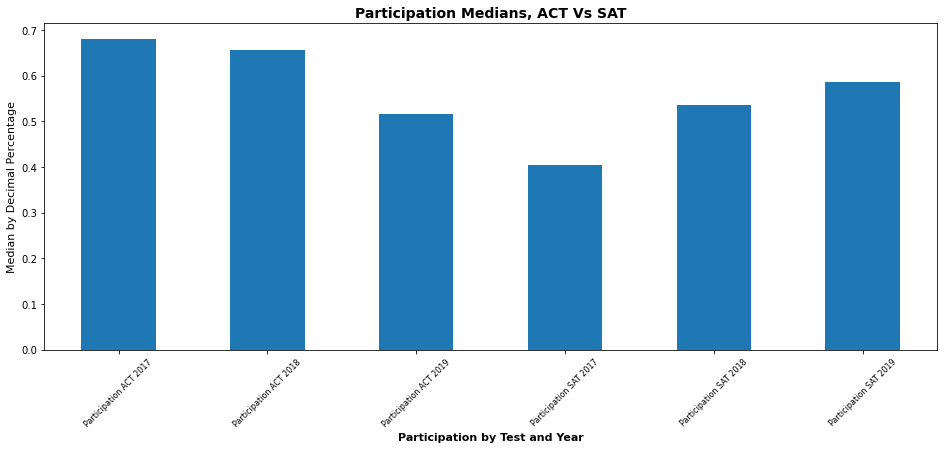

In [105]:
plt.figure(figsize = (16,6))
participation_medians.plot(kind='bar', align='center')
plt.title('Participation Medians, ACT Vs SAT', fontsize = 14, fontweight = 'bold')
plt.xticks(range(len(participation_medians)), list(xlabelsmeans))
plt.xticks(fontsize=8, rotation=45)
plt.ylabel('Median by Decimal Percentage', fontsize = 11)
plt.xlabel('Participation by Test and Year', fontsize = 11, fontweight = 'bold')
plt.savefig('../graphs/mediansactsat.png', bbox_inches='tight')
plt.show;

<function matplotlib.pyplot.show(close=None, block=None)>

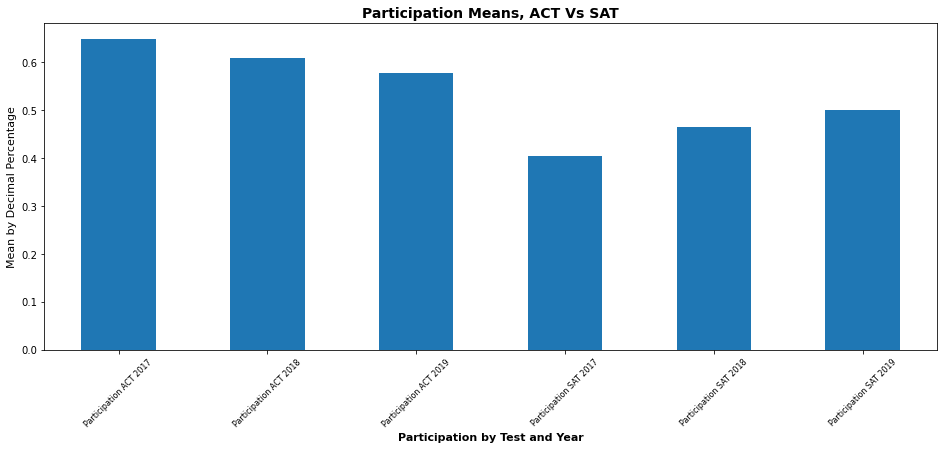

In [106]:
plt.figure(figsize = (16,6))
participation_means.plot(kind='bar', align='center')
plt.title('Participation Means, ACT Vs SAT', fontsize = 14, fontweight = 'bold')
plt.xticks(range(len(participation_means)),list(xlabelsmeans))
plt.xticks(fontsize = 8, rotation=45)
plt.ylabel('Mean by Decimal Percentage', fontsize = 11)
plt.xlabel('Participation by Test and Year', fontsize = 11, fontweight = 'bold')
plt.savefig('../graphs/meansactsat.png', bbox_inches = 'tight');
plt.show

In [107]:
# Turning the key columns into numpy arrays
satparray = satparticipation.values
actparray = actparticipation.values
sattarray = satt.values
acttarray = actt.values

In [108]:
satt.head()

,state,total17,total18,total19
0,Alabama,1165,1166,1143
1,Alaska,1080,1106,1097
2,Arizona,1116,1149,1134
3,Arkansas,1208,1169,1141
4,California,1055,1076,1065


In [109]:
actt.head()

,state,composite17,composite18,composite19
1,Alabama,19.2,19.1,18.9
2,Alaska,19.8,20.8,20.1
3,Arizona,19.7,19.2,19.0
4,Arkansas,19.4,19.4,19.3
5,California,22.8,22.7,22.6


In [110]:
satparticipation.head()

,state,participation17,participation18,participation19
0,Alabama,0.05,0.06,0.07
1,Alaska,0.38,0.43,0.41
2,Arizona,0.30,0.29,0.31
3,Arkansas,0.03,0.05,0.06
4,California,0.53,0.60,0.63


In [111]:
actparticipation.head()

,state,participation17,participation18,participation19
1,Alabama,1.00,1.00,1.00
2,Alaska,0.65,0.33,0.38
3,Arizona,0.62,0.66,0.73
4,Arkansas,1.00,1.00,1.00
5,California,0.31,0.27,0.23


#### Using describe() to get a view of the statistical summaries 

In [112]:
sattotal['participation17'].describe()

count    50.000000
mean      0.405400
std       0.352369
min       0.020000
25%       0.042500
50%       0.405000
75%       0.665000
max       1.000000
Name: participation17, dtype: float64

In [113]:
sattotal['participation18'].describe()

count    50.000000
mean      0.466000
std       0.371851
min       0.020000
25%       0.052500
50%       0.535000
75%       0.782500
max       1.000000
Name: participation18, dtype: float64

In [114]:
sattotal['participation19'].describe()

count    50.000000
mean      0.499800
std       0.385727
min       0.020000
25%       0.062500
50%       0.585000
75%       0.820000
max       1.000000
Name: participation19, dtype: float64

In [115]:
acttotal['participation17'].describe()

count    50.000000
mean      0.648800
std       0.323543
min       0.080000
25%       0.310000
50%       0.680000
75%       1.000000
max       1.000000
Name: participation17, dtype: float64

In [116]:
acttotal['participation18'].describe()

count    50.000000
mean      0.609600
std       0.339363
min       0.070000
25%       0.277500
50%       0.655000
75%       1.000000
max       1.000000
Name: participation18, dtype: float64

In [117]:
acttotal['participation19'].describe()

count    50.000000
mean      0.578400
std       0.343525
min       0.060000
25%       0.242500
50%       0.515000
75%       1.000000
max       1.000000
Name: participation19, dtype: float64

#### Numbers regarding the growth of the SAT in contrast with the ACT

In [118]:
growth_sat_participation = sattotal['participation19'].mean() - sattotal['participation17'].mean()
growth_sat_participation

0.09439999999999993

In [119]:
regression_act_participation = acttotal['participation19'].mean() - acttotal['participation17'].mean()
regression_act_participation

-0.07039999999999991

In [120]:
growth = {'SAT PARTICIPATION GROWTH': growth_sat_participation,'ACT PARTICIPATION GROWTH' : regression_act_participation}

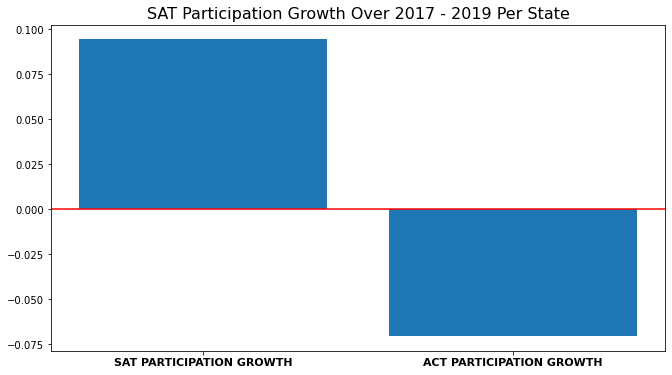

In [121]:
plt.figure(figsize = (11,6))
plt.bar(list(growth.keys()), list(growth.values()))
plt.title('SAT Participation Growth Over 2017 - 2019 Per State', fontsize = 16)
plt.axhline(0, color ='r')
plt.xticks(fontsize=11, fontweight = 'bold')
plt.savefig('../graphs/satgrowth.png', bbox_inches = 'tight')

### Process of creating a dictionary of dictionaries that feature different statistical values of importance

In [122]:
# Creating dictionary for mean values
mean_dict = {'ACTP17MEAN': acttotal['participation17'].mean(), 'ACTP18MEAN': acttotal['participation18'].mean(),
             'ACTP19MEAN': acttotal['participation19'].mean(), 'SATP17MEAN': sattotal['participation17'].mean(),
            'SATP18MEAN': sattotal['participation18'].mean(), 'SATP19MEAN': sattotal['participation19'].mean()}

mean_dict

{'ACTP17MEAN': 0.6487999999999999,
 'ACTP18MEAN': 0.6095999999999999,
 'ACTP19MEAN': 0.5784,
 'SATP17MEAN': 0.4054,
 'SATP18MEAN': 0.46599999999999997,
 'SATP19MEAN': 0.4997999999999999}

In [123]:
# Creating dictionary for standard deviation values
std_dict = {'ACTP17SD': np.std(acttotal['participation17']), 'ACTP18SD': np.std(acttotal['participation18']),
            'ACTP19SD': np.std(acttotal['participation19']), 'SATP17SD': np.std(sattotal['participation17']), 
           'SATP18SD': np.std(sattotal['participation18']), 'SATP19SD': np.std(sattotal['participation19'])}

std_dict

{'ACTP17SD': 0.3202913673516662,
 'ACTP18SD': 0.33595213944846364,
 'ACTP19SD': 0.34007269811027174,
 'SATP17SD': 0.34882780852449247,
 'SATP18SD': 0.36811411274223105,
 'SATP19SD': 0.3818507038097481}

In [124]:
# Creating dictionary for median values
median_dict = {'ACTP17MED':acttotal['participation17'].median(), 'ACTP18MED': acttotal['participation18'].median(),
              'ACTP19MED':acttotal['participation19'].median(), 'SATP17MED': sattotal['participation17'].median(),
              'SATP18MED':sattotal['participation18'].median(), 'SATP19MED': sattotal['participation19'].median()}

median_dict

{'ACTP17MED': 0.6799999999999999,
 'ACTP18MED': 0.655,
 'ACTP19MED': 0.515,
 'SATP17MED': 0.405,
 'SATP18MED': 0.535,
 'SATP19MED': 0.585}

In [125]:
satrelevant.groupby('sat_free').mean().T

sat_free,False,True
participation17,0.332571,0.575333
participation18,0.352000,0.732000
participation19,0.370286,0.802000
act_free,0.342857,0.266667
gdp_rank_19,24.942857,26.800000
population_rank,24.371429,29.066667


In [126]:
satrelevant.groupby('act_free').mean().T

act_free,False,True
participation17,0.532353,0.135625
participation18,0.615000,0.149375
participation19,0.656471,0.166875
sat_free,0.323529,0.250000
gdp_rank_19,22.323529,32.250000
population_rank,24.500000,28.500000


States that have the SAT for free are at a mean gdp rank of 26.8 while states that have the ACT for free have a mean gdp ranking of 32.25

In [127]:
satrelevant.groupby('act_free')[['participation17', 'participation18', 'participation19', 'gdp_rank_19']].agg(['median', 'mean'])

participation17           participation18           participation19  \
                  median      mean          median      mean          median   
act_free                                                                       
False              0.625  0.532353           0.685  0.615000           0.705   
True               0.045  0.135625           0.055  0.149375           0.065   

                   gdp_rank_19             
              mean      median       mean  
act_free                                   
False     0.656471        20.5  22.323529  
True      0.166875        32.5  32.250000

In [128]:
satrelevant.groupby('sat_free')[['participation17', 'participation18', 'participation19']].agg(['median', 'mean'])

participation17           participation18        participation19  \
                  median      mean          median   mean          median   
sat_free                                                                    
False               0.30  0.332571            0.29  0.352            0.31   
True                0.71  0.575333            0.97  0.732            0.99   

                    
              mean  
sat_free            
False     0.370286  
True      0.802000

Turning columns into panda series values

In [129]:
satp17 = sattotal['participation17'].values
satt17 = sattotal['total17'].values
satp18 = sattotal['participation18'].values
satt18 = sattotal['total18'].values
satp19 = sattotal['participation19'].values
satt19 = sattotal['total19'].values
actp17 = acttotal['participation17'].values
actt17 = acttotal['composite17'].values
actp18 = acttotal['participation18'].values
actt18 = acttotal['composite18'].values
actp19 = acttotal['participation19'].values
actt19 = acttotal['composite19'].values
gdpval = sattotal['gdp_rank_19'].values
popval = sattotal['population_rank'].values

Correlation coefficient function and covariance function

In [130]:
def get_covariance(x, y):
    cov = ((x - x.mean()) * (y - y.mean())).sum() / len(x)
    return cov

In [131]:
def get_cor(cov, x, y):
    cor = cov / (np.std(x) * np.std(y))
    return cor

Calculating covariance and corellation coefficient for a number of columns

In [132]:
#Calculating covariance for total and creation of a new dictionary for the covariance values
cov_sat_total_17 = get_covariance(satp17, satt17)
cov_sat_total_18 = get_covariance(satp18, satt18)
cov_sat_total_19 = get_covariance(satp19, satt19)
cov_act_total_17 = get_covariance(actp17, actt17)
cov_act_total_18 = get_covariance(actp18, actt18)
cov_act_total_19 = get_covariance(actp19, actt19)

covariance_total_dict = {'SAT_TOTAL_COVARIANCE_2017': cov_sat_total_17, 
                        'SAT_TOTAL_COVARIANCE_2018': cov_sat_total_18, 'SAT_TOTAL_COVARIANCE_2019': cov_sat_total_19,
                  'ACT_TOTAL_COVARIANCE_2017': cov_act_total_17, 'ACT_TOTAL_COVARIANCE_2018': cov_act_total_18,
                        'ACT_TOTAL_COVARIANCE_2019': cov_act_total_19}
covariance_total_dict

{'SAT_TOTAL_COVARIANCE_2017': -27.354224,
 'SAT_TOTAL_COVARIANCE_2018': -26.46128,
 'SAT_TOTAL_COVARIANCE_2019': -31.075972,
 'ACT_TOTAL_COVARIANCE_2017': -0.5568736000000001,
 'ACT_TOTAL_COVARIANCE_2018': -0.6098503999999999,
 'ACT_TOTAL_COVARIANCE_2019': -0.6442296000000001}

In [133]:
#Calculating covariance for gdp and creation of a new dictionary for the covariance values
cov_sat_gdp_17 = get_covariance(satp17, gdpval)
cov_sat_gdp_18 = get_covariance(satp18, gdpval)
cov_sat_gdp_19 = get_covariance(satp19, gdpval)
cov_act_gdp_17 = get_covariance(actp17, gdpval)
cov_act_gdp_18 = get_covariance(actp18, gdpval)
cov_act_gdp_19 = get_covariance(actp19, gdpval)
covariance_gdp_dict = {'SAT_GDP_COVARIANCE_2017': cov_sat_gdp_17, 'SAT_GDP_COVARIANCE_2018': cov_sat_gdp_18,
                       'SAT_GDP_COVARIANCE_2019': cov_sat_gdp_19, 'ACT_GDP_COVARIANCE_2017': cov_act_gdp_17,
                       'ACT_GDP_COVARIANCE_2018': cov_act_gdp_18, 'ACT_GDP_COVARIANCE_2019': cov_act_gdp_19}
covariance_gdp_dict

{'SAT_GDP_COVARIANCE_2017': -1.3213000000000001,
 'SAT_GDP_COVARIANCE_2018': -1.8024,
 'SAT_GDP_COVARIANCE_2019': -1.3086999999999998,
 'ACT_GDP_COVARIANCE_2017': 1.6184,
 'ACT_GDP_COVARIANCE_2018': 2.0669999999999997,
 'ACT_GDP_COVARIANCE_2019': 1.9634}

In [134]:
#Calculating covariance for population and creation of a new dictionary for the covariance values
cov_sat_pop_17 = get_covariance(satp17, popval)
cov_sat_pop_18 = get_covariance(satp18, popval)
cov_sat_pop_19 = get_covariance(satp19, popval)
cov_act_pop_17 = get_covariance(actp17, popval)
cov_act_pop_18 = get_covariance(actp18, popval)
cov_act_pop_19 = get_covariance(actp19, popval)
covariance_pop_dict = {'SAT_POPULATION_COVARIANCE_2017': cov_sat_pop_17, 'SAT_POPULATION_COVARIANCE_2018': cov_sat_pop_18, 
                      'SAT_POPULATION_COVARIANCE_2019': cov_sat_pop_19, 'ACT_POPULATION_COVARIANCE_2017': cov_act_pop_17,
                      'ACT_POPULATION_COVARIANCE_2018': cov_act_pop_18, 'ACT_POPULATION_COVARIANCE_2019': cov_act_pop_19}
covariance_pop_dict

{'SAT_POPULATION_COVARIANCE_2017': -0.5058119999999999,
 'SAT_POPULATION_COVARIANCE_2018': -0.9276800000000001,
 'SAT_POPULATION_COVARIANCE_2019': -0.9870439999999999,
 'ACT_POPULATION_COVARIANCE_2017': 0.32813599999999987,
 'ACT_POPULATION_COVARIANCE_2018': 0.42451200000000017,
 'ACT_POPULATION_COVARIANCE_2019': 0.5496480000000001}

In [135]:
#Calculating correlation coefficient for gdp and creation of a new dictionary for the coefficient values
gdp_coefficient_17_sat = get_cor(cov_sat_gdp_17, satp17, gdpval)
gdp_coefficient_18_sat = get_cor(cov_sat_gdp_18, satp18, gdpval)
gdp_coefficient_19_sat = get_cor(cov_sat_gdp_19, satp19, gdpval)
gdp_coefficient_17_act = get_cor(cov_act_gdp_17, actp17, gdpval)
gdp_coefficient_18_act = get_cor(cov_act_gdp_18, actp18, gdpval)
gdp_coefficient_19_act = get_cor(cov_act_gdp_19, actp19, gdpval)
correlation_gdp_dict = {'COEFFICIENT_GDP_SAT_17': gdp_coefficient_17_sat, 'COEFFICIENT_GDP_SAT_18': gdp_coefficient_18_sat, 
                        'COEFFICIENT_GDP_SAT_19': gdp_coefficient_19_sat, 'COEFFICIENT_GDP_ACT_17': gdp_coefficient_17_act, 
                        'COEFFICIENT_GDP_ACT_18': gdp_coefficient_18_act, 'COEFFICIENT_GDP_ACT_19': gdp_coefficient_19_act}
correlation_gdp_dict

{'COEFFICIENT_GDP_SAT_17': -0.26248097487740935,
 'COEFFICIENT_GDP_SAT_18': -0.339294020470995,
 'COEFFICIENT_GDP_SAT_19': -0.23749474360249462,
 'COEFFICIENT_GDP_ACT_17': 0.350145162962404,
 'COEFFICIENT_GDP_ACT_18': 0.4263542145983095,
 'COEFFICIENT_GDP_ACT_19': 0.40007785632935094}

Correlation coefficient between SAT participation and the GDP is negatively correlated. Meaning that there is a correlation between higher SAT participation and a state being richer.

In [136]:
#Calculating correlation coefficient for total and creation of a new dictionary for the coefficient values
total_coefficient_17_sat = get_cor(cov_sat_total_17, satp17, satt17)
total_coefficient_18_sat = get_cor(cov_sat_total_18, satp18, satt18)
total_coefficient_19_sat = get_cor(cov_sat_total_19, satp19, satt19)
total_coefficient_17_act = get_cor(cov_act_total_17, actp17, actt17)
total_coefficient_18_act = get_cor(cov_act_total_18, actp18, actt18)
total_coefficient_19_act = get_cor(cov_act_total_19, actp19, actt19)
correlation_total_dict = {'COEFFICIENT_TOTAL_SAT_2017': total_coefficient_17_sat, 'COEFFICIENT_TOTAL_SAT_2018':
                         total_coefficient_18_sat, 'COEFFICIENT_TOTAL_SAT_2019': total_coefficient_19_sat, 
                         'COEFFICIENT_TOTAL_ACT_2017': total_coefficient_17_act, 'COEFFICIENT_TOTAL_ACT_2018':
                         total_coefficient_18_act, 'COEFFICIENT_TOTAL_ACT_2019': total_coefficient_19_act}
correlation_total_dict

{'COEFFICIENT_TOTAL_SAT_2017': -0.864567123110755,
 'COEFFICIENT_TOTAL_SAT_2018': -0.7792338238717716,
 'COEFFICIENT_TOTAL_SAT_2019': -0.8575098282389777,
 'COEFFICIENT_TOTAL_ACT_2017': -0.860451059181829,
 'COEFFICIENT_TOTAL_ACT_2018': -0.863540521785166,
 'COEFFICIENT_TOTAL_ACT_2019': -0.8671839434916802}

In [137]:
#Calculating correlation coefficient for population and creation of a new dictionary for the coefficient values
pop_coefficient_17_sat = get_cor(cov_sat_pop_17, satp17, popval)
pop_coefficient_18_sat = get_cor(cov_sat_pop_18, satp18, popval)
pop_coefficient_19_sat = get_cor(cov_sat_pop_19, satp19, popval)
pop_coefficient_17_act = get_cor(cov_act_pop_17, actp17, popval)
pop_coefficient_18_act = get_cor(cov_act_pop_18, actp18, popval)
pop_coefficient_19_act = get_cor(cov_act_pop_19, actp19, popval)
correlation_pop_dict = {'COEFFICIENT_POPULATION_SAT_17': pop_coefficient_17_sat, 'COEFFICIENT_POPULATION_SAT_18': pop_coefficient_18_sat,
                       'COEFFICIENT_POPULATION_SAT_19': pop_coefficient_19_sat, 'COEFFICIENT_POPULATION_ACT_17': pop_coefficient_17_act,
                       'COEFFICIENT_POPULATION_ACT_18': pop_coefficient_18_act, 'COEFFICIENT_POPULATION_ACT_19': pop_coefficient_19_act}
correlation_pop_dict

{'COEFFICIENT_POPULATION_SAT_17': -0.09808913531783432,
 'COEFFICIENT_POPULATION_SAT_18': -0.17047417728652334,
 'COEFFICIENT_POPULATION_SAT_19': -0.174858115974191,
 'COEFFICIENT_POPULATION_ACT_17': 0.06930291839771364,
 'COEFFICIENT_POPULATION_ACT_18': 0.08547821361337836,
 'COEFFICIENT_POPULATION_ACT_19': 0.10933413219415648}

Correlation coefficient between the population and sat participation is negative for the SAT, meaning that SAT participation is slanted towards states that have a higher density

IQR

In [138]:
#IQR Function
def iqrcreation(x,y):
    Q1 = x[y].quantile(0.25)
    Q3 = x[y].quantile(0.75)
    return (Q3 - Q1)

In [139]:
#Calculating IQR and creation of a new dictionary for IQR values
IQRSATP17 = iqrcreation(sattotal, 'participation17')
IQRSATP18 = iqrcreation(sattotal, 'participation18')
IQRSATP19 = iqrcreation(sattotal, 'participation19')
IQRACTP17 = iqrcreation(acttotal, 'participation17')
IQRACTP18 = iqrcreation(acttotal, 'participation18')
IQRACTP19 = iqrcreation(acttotal, 'participation19')
iqr_dict = {'IQRSATP17': IQRSATP17, 'IQRSATP18': IQRSATP18, 'IQRSATP19': IQRSATP19,
           'IQRACTP17': IQRACTP17, 'IQRACTP18': IQRACTP18, 'IQRACTP19': IQRACTP19}
iqr_dict

{'IQRSATP17': 0.6225,
 'IQRSATP18': 0.73,
 'IQRSATP19': 0.7575,
 'IQRACTP17': 0.69,
 'IQRACTP18': 0.7224999999999999,
 'IQRACTP19': 0.7575000000000001}

### Dictionary of stats creation + visualization of analysis

In [140]:
xlabels = ['SAT 2017', 'SAT 2018', 'SAT 2019', 'ACT 2017', 'ACT 2018', 'ACT 2019']

In [141]:
dictionary_of_stats = [mean_dict, std_dict, median_dict, iqr_dict, correlation_gdp_dict, correlation_total_dict, correlation_pop_dict, covariance_total_dict, covariance_gdp_dict, covariance_pop_dict]

dictionary_of_stats

[{'ACTP17MEAN': 0.6487999999999999,
  'ACTP18MEAN': 0.6095999999999999,
  'ACTP19MEAN': 0.5784,
  'SATP17MEAN': 0.4054,
  'SATP18MEAN': 0.46599999999999997,
  'SATP19MEAN': 0.4997999999999999},
 {'ACTP17SD': 0.3202913673516662,
  'ACTP18SD': 0.33595213944846364,
  'ACTP19SD': 0.34007269811027174,
  'SATP17SD': 0.34882780852449247,
  'SATP18SD': 0.36811411274223105,
  'SATP19SD': 0.3818507038097481},
 {'ACTP17MED': 0.6799999999999999,
  'ACTP18MED': 0.655,
  'ACTP19MED': 0.515,
  'SATP17MED': 0.405,
  'SATP18MED': 0.535,
  'SATP19MED': 0.585},
 {'IQRSATP17': 0.6225,
  'IQRSATP18': 0.73,
  'IQRSATP19': 0.7575,
  'IQRACTP17': 0.69,
  'IQRACTP18': 0.7224999999999999,
  'IQRACTP19': 0.7575000000000001},
 {'COEFFICIENT_GDP_SAT_17': -0.26248097487740935,
  'COEFFICIENT_GDP_SAT_18': -0.339294020470995,
  'COEFFICIENT_GDP_SAT_19': -0.23749474360249462,
  'COEFFICIENT_GDP_ACT_17': 0.350145162962404,
  'COEFFICIENT_GDP_ACT_18': 0.4263542145983095,
  'COEFFICIENT_GDP_ACT_19': 0.40007785632935094},

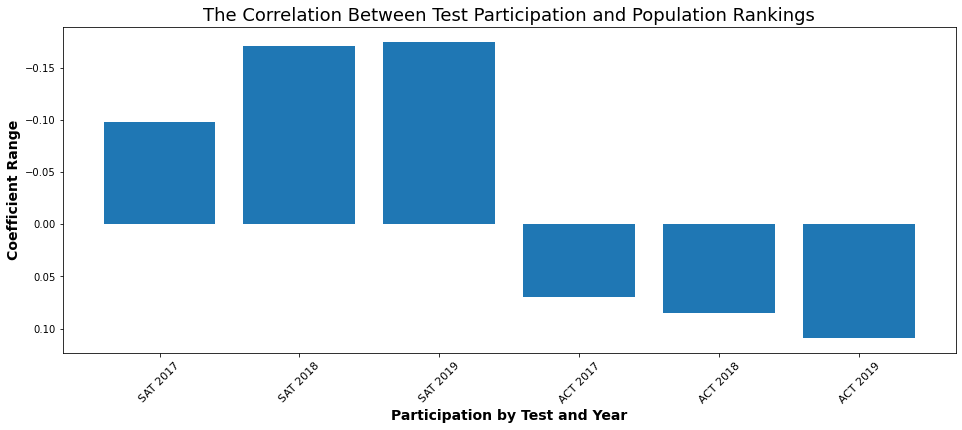

In [142]:
#Creation of population X participation correlation coefficient bar chart
plt.figure(figsize=(16,6))
plt.bar(range(len(correlation_pop_dict)), list(correlation_pop_dict.values()), align='center')
plt.title('The Correlation Between Test Participation and Population Rankings', fontsize = 18)
plt.xlabel('Participation by Test and Year', fontsize = 14, fontweight = 'bold')
plt.ylabel('Coefficient Range', fontsize = 14, fontweight = 'bold')
plt.gca().invert_yaxis()
plt.xticks(range(len(correlation_pop_dict)), list(xlabels))
plt.xticks(fontsize = 11, rotation=45);
plt.savefig('../graphs/correlationpopulation', bbox_inches = 'tight')

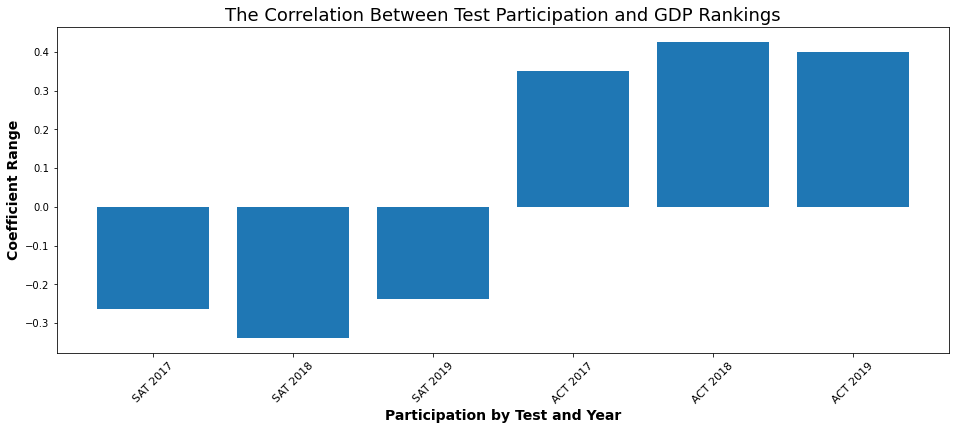

In [143]:
#Creation of Participation X GDP correlation coefficient bar chart
plt.figure(figsize=(16,6))
plt.bar(range(len(correlation_gdp_dict)), list(correlation_gdp_dict.values()), align='center')
plt.title('The Correlation Between Test Participation and GDP Rankings', fontsize = 18)
plt.ylabel('Coefficient Range', fontsize = 14, fontweight = 'bold')
plt.xlabel('Participation by Test and Year', fontsize = 14, fontweight = 'bold')
plt.xticks(range(len(correlation_gdp_dict)), list(xlabels))
plt.xticks(fontsize = 11, rotation=45);
plt.savefig('../graphs/correlationgdp', bbox_inches = 'tight')

#### Making additional graphs

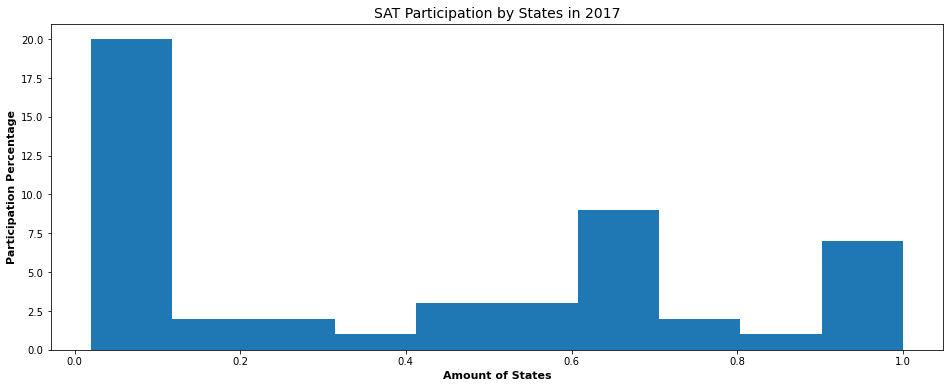

In [144]:
plt.figure(figsize=(16,6))
plt.hist(sattotal['participation17'])
plt.title('SAT Participation by States in 2017', fontsize = 14);
plt.ylabel('Participation Percentage', fontsize = 11, fontweight ='bold')
plt.xlabel('Amount of States', fontsize = 11, fontweight = 'bold')
plt.savefig('../graphs/2017histsat', bbox_inches = 'tight')

''

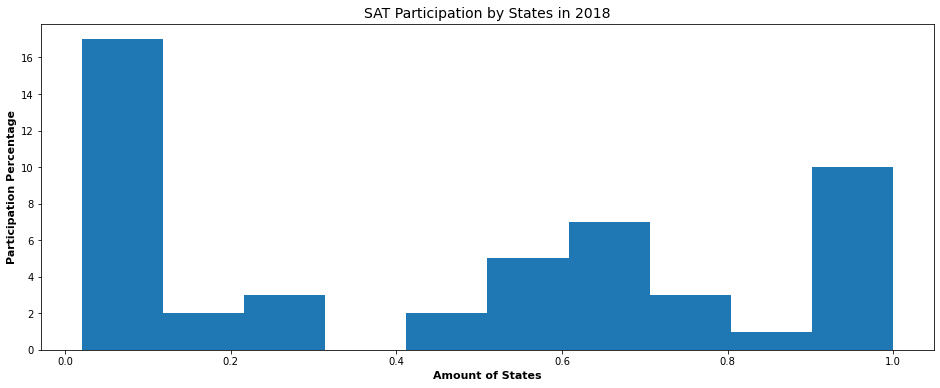

In [145]:
plt.figure(figsize=(16,6))
plt.hist(sattotal['participation18'])
plt.title('SAT Participation by States in 2018', fontsize = 14)
plt.ylabel('Participation Percentage', fontsize = 11, fontweight = 'bold')
plt.xlabel('Amount of States', fontsize = 11, fontweight ='bold')
plt.savefig('../graphs/2018histsat', bbox_inches = 'tight')
;

''

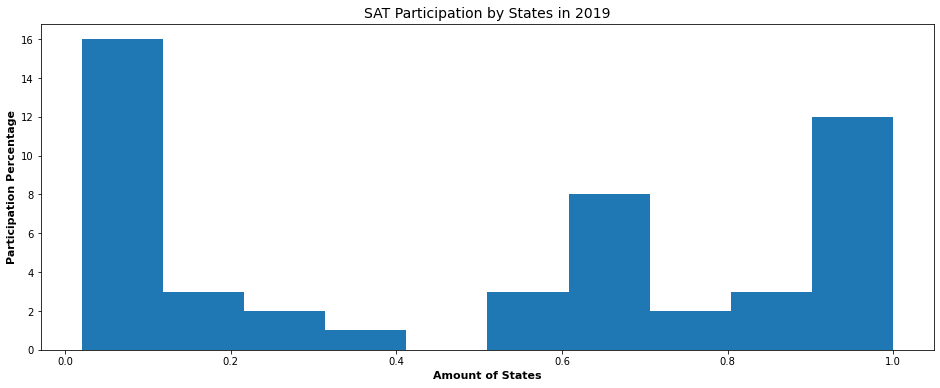

In [146]:
plt.figure(figsize=(16,6))
plt.hist(sattotal['participation19'])
plt.title('SAT Participation by States in 2019', fontsize=14);
plt.ylabel('Participation Percentage', fontsize = 11, fontweight = 'bold')
plt.xlabel('Amount of States', fontsize = 11, fontweight = 'bold')
plt.savefig('../graphs/2019histsat', bbox_inches = 'tight')
;

### Histograms will be omitted from final version
Histograms dont nearly tell as much as the bar charts and the scatterplots

''

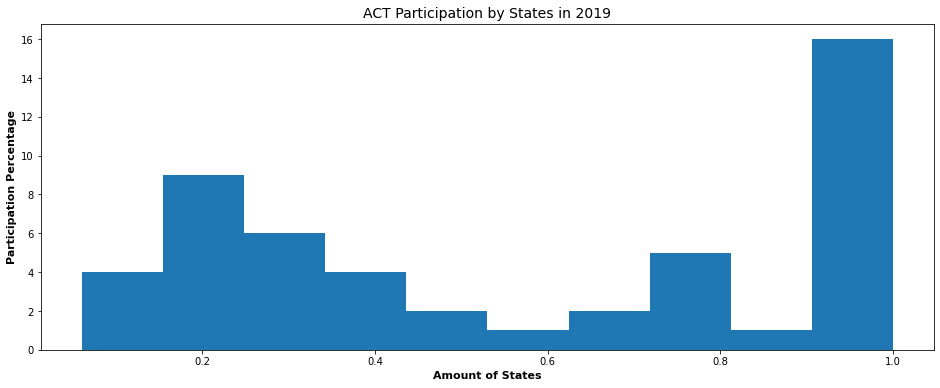

In [147]:
plt.figure(figsize=(16,6))
plt.hist(acttotal['participation19'])
plt.title('ACT Participation by States in 2019', fontsize = 14)
plt.ylabel('Participation Percentage', fontsize = 11, fontweight = 'bold')
plt.xlabel('Amount of States', fontsize = 11, fontweight = 'bold')
plt.savefig('../graphs/2019histact', bbox_inches = 'tight')
;

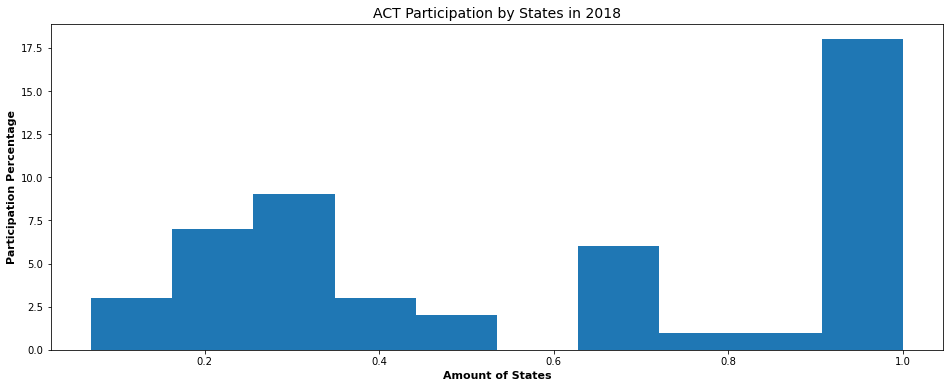

In [148]:
plt.figure(figsize=(16,6))
plt.hist(acttotal['participation18'])
plt.title('ACT Participation by States in 2018', fontsize = 14)
plt.ylabel('Participation Percentage', fontsize = 11, fontweight = 'bold')
plt.xlabel('Amount of States', fontsize = 11, fontweight = 'bold')
plt.savefig('../graphs/2018histact', bbox_inches = 'tight')

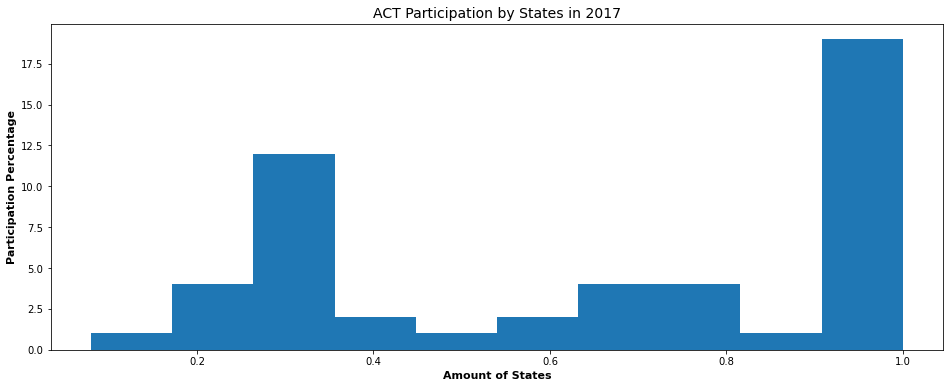

In [149]:
plt.figure(figsize=(16,6))
plt.hist(acttotal['participation17'])
plt.title('ACT Participation by States in 2017', fontsize = 14)
plt.ylabel('Participation Percentage', fontsize = 11, fontweight = 'bold')
plt.xlabel('Amount of States', fontsize = 11, fontweight = 'bold')
plt.savefig('../graphs/2017histact', bbox_inches = 'tight')

Creation of the Correlation heat maps

In [150]:
sat17forcorr = sattotal[['state', 'total17', 'math17', 'ebrw17', 'participation17']].corr()
sat17forcorr

,total17,math17,ebrw17,participation17
total17,1.000000,0.624459,0.996574,-0.864567
math17,0.624459,1.000000,0.620186,-0.558088
ebrw17,0.996574,0.620186,1.000000,-0.871393
participation17,-0.864567,-0.558088,-0.871393,1.000000


In [151]:
sat18forcorr = sattotal[['state', 'total18', 'math18', 'ebrw18', 'participation18']].corr()
sat18forcorr

,total18,math18,ebrw18,participation18
total18,1.000000,0.988148,0.988099,-0.779234
math18,0.988148,1.000000,0.952816,-0.784836
ebrw18,0.988099,0.952816,1.000000,-0.754588
participation18,-0.779234,-0.784836,-0.754588,1.000000


In [152]:
sat19forcorr = sattotal[['state', 'total19', 'math19', 'ebrw19', 'participation19']].corr()
sat19forcorr

,total19,math19,ebrw19,participation19
total19,1.000000,0.996674,0.995991,-0.857510
math19,0.996674,1.000000,0.985436,-0.840995
ebrw19,0.995991,0.985436,1.000000,-0.869497
participation19,-0.857510,-0.840995,-0.869497,1.000000


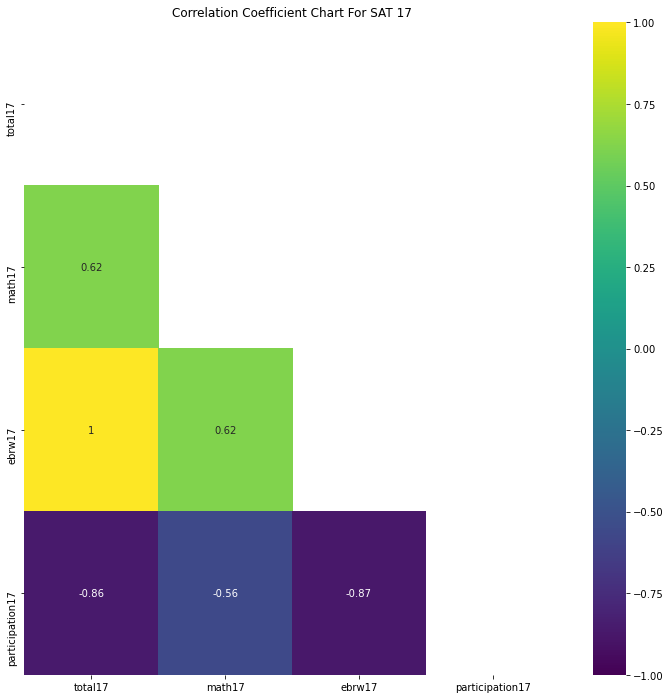

In [153]:
mask17 = np.zeros_like(sat17forcorr)
mask17[np.triu_indices_from(mask17)] = True

plt.figure(figsize=(12,12))
plt.title('Correlation Coefficient Chart For SAT 17')
sns.heatmap(sat17forcorr, cmap='viridis', vmin=-1, vmax=1, annot = True, mask = mask17);
plt.savefig('../graphs/sat17corrmap.png', bbox_inches='tight')

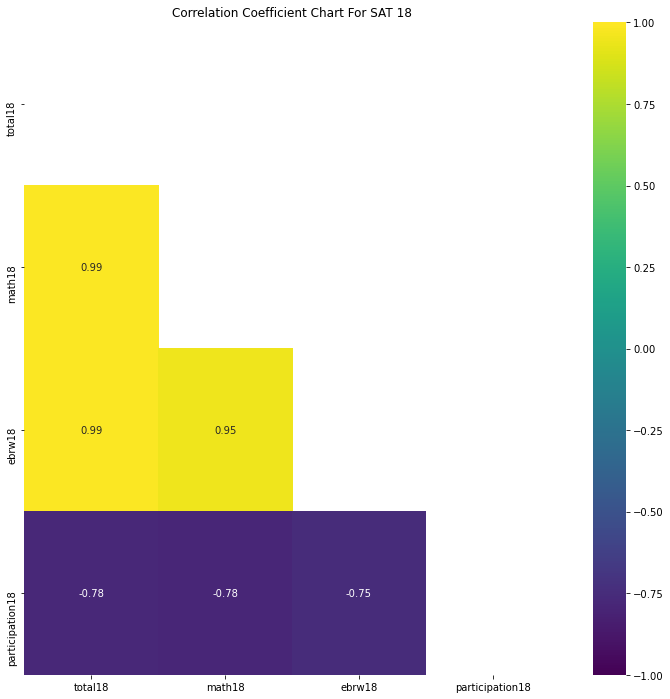

In [154]:
mask18 = np.zeros_like(sat18forcorr)
mask18[np.triu_indices_from(mask18)] = True

plt.figure(figsize=(12,12))
plt.title('Correlation Coefficient Chart For SAT 18')
sns.heatmap(sat18forcorr, cmap='viridis', vmin=-1, vmax=1, annot = True, mask = mask18);
plt.savefig('../graphs/sat18corrmap.png', bbox_inches='tight')

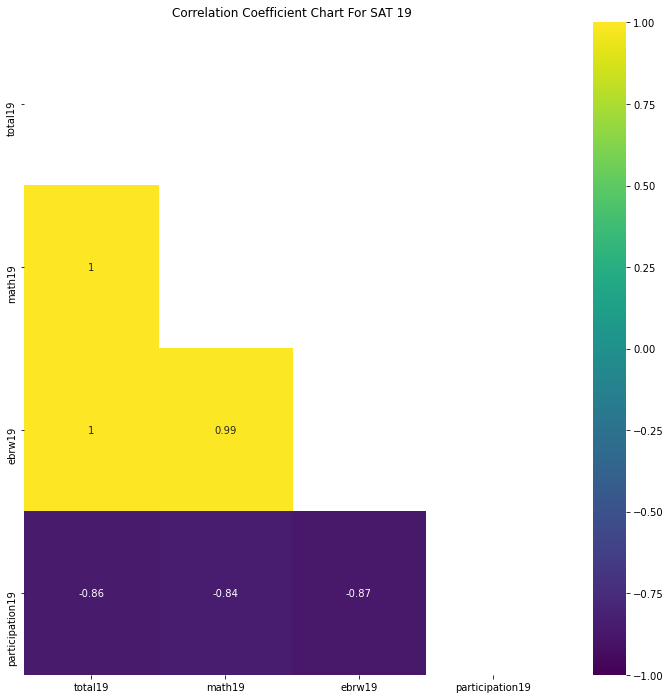

In [155]:
mask19 = np.zeros_like(sat19forcorr)
mask19[np.triu_indices_from(mask19)] = True

plt.figure(figsize=(12,12))
plt.title('Correlation Coefficient Chart For SAT 19')
sns.heatmap(sat19forcorr, cmap='viridis', vmin=-1, vmax=1, annot = True, mask = mask19);
plt.savefig('../graphs/sat19corrmap.png', bbox_inches='tight')

### No Coefficient Heatmap
I opted not to go with the correlation coefficient heatmaps as it's difficult to explain a correlation coefficient chart like this in a five minute presentation when the audience in question is supposed to have little to no technical experience + not as relevant as other graphs included.

### EDA Question in Sample Code provided
Use a dictionary comprehension to apply the standard deviation function you create in part 1 to each numeric column in the dataframe. No loops.
Assign the output to variable sd as a dictionary where:
Each column name is now a key
That standard deviation of the column is the value
Example Output : {'ACT_Math': 120, 'ACT_Reading': 120, ...}

In [156]:
def get_std_dev(x):
    lst = []
    for num in x:
        num = (num - (sum(x)/ (len(x)))) ** 2
        lst.append(num)
    return sum(lst) / (len(x)) ** (1/2)

In [157]:
satdemos = sattotal[['participation17', 'participation18', 'participation19', 'gdp_rank_19', 'population_rank']]

In [158]:
satstd = {key: get_std_dev(satdemos[key]) for key in satdemos}

In [159]:
satstd

{'participation17': 0.8604134710447529,
 'participation18': 0.9581862570502667,
 'participation19': 1.0310321148053923,
 'gdp_rank_19': 1472.5498718209851,
 'population_rank': 1545.2517626354615}